In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from mpl_toolkits.mplot3d import Axes3D
from typing import List, Tuple, Optional

In [2]:
class VectorSpaceVisualizer:
    def __init__(self):
        self.vectors = []
        self.dimension = None
    
    def add_vector(self, vector: np.ndarray) -> None:
        """Add a vector to the collection."""
        vector = np.array(vector, dtype=float)
        if self.dimension is None:
            self.dimension = len(vector)
        elif len(vector) != self.dimension:
            raise ValueError(f"Vector must be {self.dimension}-dimensional")
        self.vectors.append(vector)
    
    def check_linear_independence(self) -> Tuple[bool, str]:
        """
        Check if the vectors are linearly independent.
        Returns: (is_independent, explanation)
        """
        if not self.vectors:
            return True, "No vectors in the set"
        
        matrix = np.vstack(self.vectors)
        rank = np.linalg.matrix_rank(matrix)
        
        is_independent = rank == len(self.vectors)
        explanation = (
            f"Rank of matrix: {rank}\n"
            f"Number of vectors: {len(self.vectors)}\n"
            f"The vectors are {'linearly independent' if is_independent else 'linearly dependent'}"
        )
        return is_independent, explanation
    
    def compute_span_2d(self, grid_points: int = 20) -> np.ndarray:
        """Compute points in the span of 2D vectors."""
        if self.dimension != 2:
            raise ValueError("This method only works for 2D vectors")
        
        if not self.vectors:
            return np.zeros((0, 2))
        
        matrix = np.vstack(self.vectors)

        t = np.linspace(-2, 2, grid_points)
        coefficients = np.meshgrid(*[t for _ in range(len(self.vectors))])
        coefficients = np.array([c.flatten() for c in coefficients]).T

        span_points = coefficients @ matrix
        return span_points
    
    def find_basis(self) -> List[np.ndarray]:
        """Find a basis for the span of the vectors."""
        if not self.vectors:
            return []
        
        matrix = np.vstack(self.vectors)
        _, _, vh = np.linalg.svd(matrix)
        rank = np.linalg.matrix_rank(matrix)
        
        basis_vectors = [vh[i] for i in range(rank)]
        return basis_vectors
    
    def represent_vector(self, target_vector: np.ndarray) -> Tuple[Optional[np.ndarray], str]:
        """
        Represent a target vector as a linear combination of the current vectors.
        Returns: (coefficients, explanation)
        """
        if not self.vectors:
            return None, "No vectors in the set"
        
        matrix = np.vstack(self.vectors)
        try:
            coefficients = np.linalg.lstsq(matrix.T, target_vector, rcond=None)[0]
            error = np.linalg.norm(matrix.T @ coefficients - target_vector)
            
            if error < 1e-10:
                explanation = "Vector is in the span. Coefficients:\n"
                for i, coef in enumerate(coefficients):
                    explanation += f"Vector {i+1}: {coef:.3f}\n"
            else:
                explanation = f"Vector is not in the span. Best approximation has error {error:.3f}"
            
            return coefficients, explanation
        except np.linalg.LinAlgError:
            return None, "Could not compute coefficients"
    
    def visualize_2d(self, span_points: Optional[np.ndarray] = None) -> None:
        """Visualize vectors and their span in 2D."""
        if self.dimension != 2:
            raise ValueError("This method only works for 2D vectors")
        
        plt.figure(figsize=(10, 10))
        ax = plt.gca()
        
        if span_points is not None:
            hull = Polygon(span_points, alpha=0.2, color='gray')
            ax.add_patch(hull)
        
        for i, v in enumerate(self.vectors):
            plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1,
                      color=f'C{i}', label=f'Vector {i+1}')

        plt.grid(True)
        plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
        plt.legend()

        max_coord = max([abs(v).max() for v in self.vectors]) if self.vectors else 1
        plt.xlim(-max_coord*1.2, max_coord*1.2)
        plt.ylim(-max_coord*1.2, max_coord*1.2)
        plt.axis('equal')
        plt.title('2D Vector Visualization')
        plt.show()

In [4]:
def independent():
    vs = VectorSpaceVisualizer()
    vs.add_vector([1, 1])
    vs.add_vector([-1, 1])
    
    is_independent, explanation = vs.check_linear_independence()
    print("Linear Independence Check:")
    print(explanation)
    print()
    
    span_points = vs.compute_span_2d()
    vs.visualize_2d(span_points)

    basis = vs.find_basis()
    print("Basis vectors:")
    for i, v in enumerate(basis):
        print(f"Basis vector {i+1}: {v}")
    print()

    target = np.array([1, 0])
    coefficients, explanation = vs.represent_vector(target)
    print("Vector representation:")
    print(explanation)

Linear Independence Check:
Rank of matrix: 2
Number of vectors: 2
The vectors are linearly independent



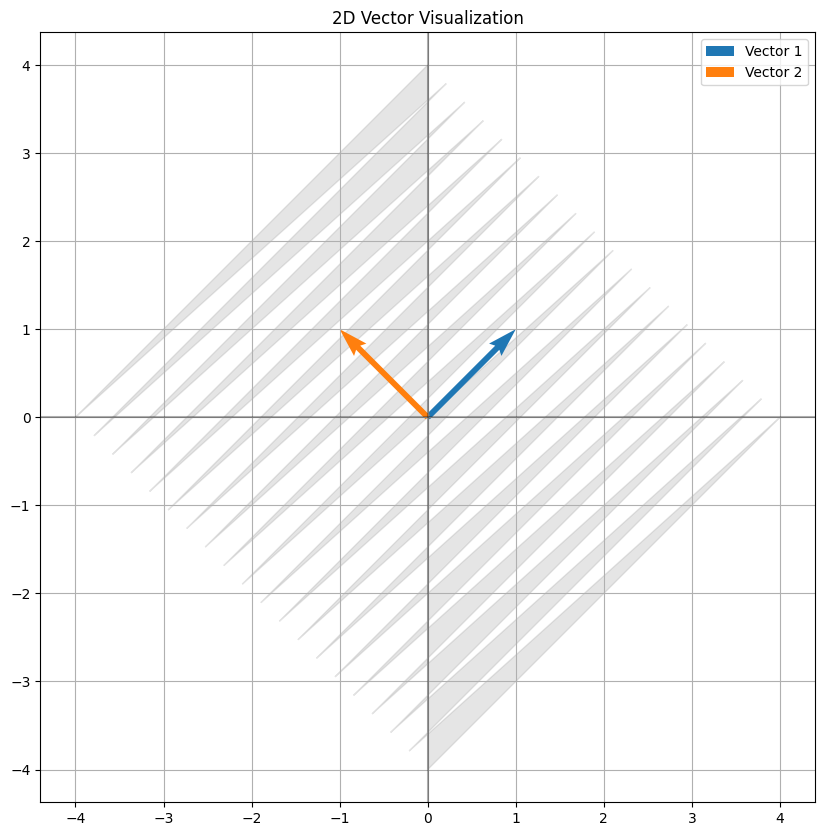

Basis vectors:
Basis vector 1: [-1. -0.]
Basis vector 2: [0. 1.]

Vector representation:
Vector is in the span. Coefficients:
Vector 1: 0.500
Vector 2: -0.500



In [5]:
independent()

In [6]:
def dependent():
    vs = VectorSpaceVisualizer()
    vs.add_vector([1, 2])
    vs.add_vector([2, 4])
    
    is_independent, explanation = vs.check_linear_independence()
    print("Linear Independence Check:")
    print(explanation)
    print()
    
    span_points = vs.compute_span_2d()
    vs.visualize_2d(span_points)

    basis = vs.find_basis()
    print("Basis vectors:")
    for i, v in enumerate(basis):
        print(f"Basis vector {i+1}: {v}")
    print()

    target = np.array([1, 0])
    coefficients, explanation = vs.represent_vector(target)
    print("Vector representation:")
    print(explanation)

Linear Independence Check:
Rank of matrix: 1
Number of vectors: 2
The vectors are linearly dependent



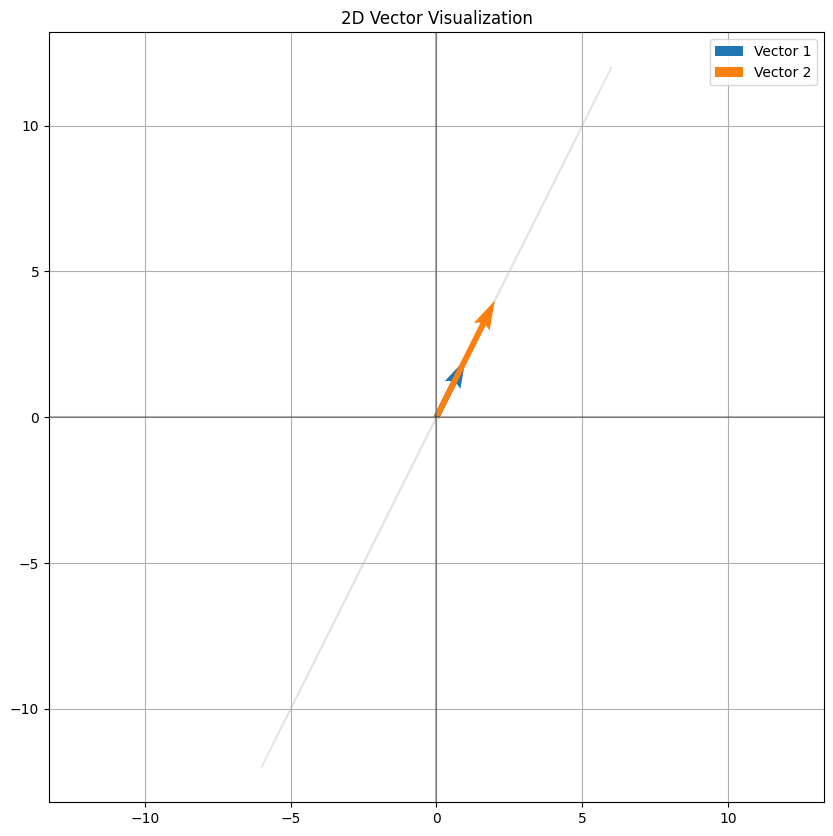

Basis vectors:
Basis vector 1: [-0.4472136  -0.89442719]

Vector representation:
Vector is not in the span. Best approximation has error 0.894


In [7]:
dependent()